In [1]:
!pip install kaggle

In [3]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [00:24<00:00, 162MB/s]
100% 3.10G/3.10G [00:25<00:00, 131MB/s]


In [6]:
!mkdir dataset

In [7]:
!ls

 breast-histopathology-images.zip  'kaggle (1).json'   sample_data
 dataset			    kaggle.json


In [8]:
!unzip -q breast-histopathology-images.zip -d dataset

In [9]:
# "10253" as training dataset
# "10254" as test dataset

!cp -r "/content/dataset/10253" training_set
!cp -r "/content/dataset/10254" testing_set

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data should not be augmented
validation_datagen = ImageDataGenerator(rescale=1.0/255)


In [12]:
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=(224, 224),  # Adjust the size as needed
    batch_size=batch_size,
    class_mode='categorical'  # Change based on your problem (binary or categorical)
)

validation_generator = validation_datagen.flow_from_directory(
    'testing_set',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 549 images belonging to 2 classes.
Found 848 images belonging to 2 classes.


In [13]:
base_model = VGG16(weights='imagenet', include_top=False)  # Exclude the top fully connected layers


58889256/58889256 [==============================] - 1s 0us/step


In [14]:
num_classes = 2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add more dense layers as needed
predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes

model = Model(inputs=base_model.input, outputs=predictions)


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
18/18 [==============================] - 1440s 81s/step - loss: 1.2327 - accuracy: 0.7996 - val_loss: 0.3611 - val_accuracy: 0.9104
Epoch 2/10
18/18 [==============================] - 1422s 83s/step - loss: 0.4344 - accuracy: 0.8725 - val_loss: 0.3316 - val_accuracy: 0.9104
Epoch 3/10
18/18 [==============================] - 1423s 80s/step - loss: 0.3913 - accuracy: 0.8725 - val_loss: 0.3227 - val_accuracy: 0.9104
Epoch 4/10
18/18 [==============================] - 1419s 80s/step - loss: 0.3841 - accuracy: 0.8725 - val_loss: 0.3061 - val_accuracy: 0.9104
Epoch 5/10
18/18 [==============================] - 1419s 80s/step - loss: 0.3907 - accuracy: 0.8725 - val_loss: 0.3016 - val_accuracy: 0.9104
Epoch 6/10
18/18 [==============================] - 1417s 80s/step - loss: 0.3824 - accuracy: 0.8725 - val_loss: 0.3095 - val_accuracy: 0.9104
Epoch 7/10
18/18 [==============================] - 1407s 79s/step - loss: 0.3856 - accuracy: 0.8725 - val_loss: 0.3071 - val_accuracy: 0.9104

In [17]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    'testing_set',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 848 images belonging to 2 classes.
27/27 [==============================] - 456s 17s/step - loss: 0.3037 - accuracy: 0.9104
Test Loss: 0.30365878343582153
Test Accuracy: 0.9103773832321167


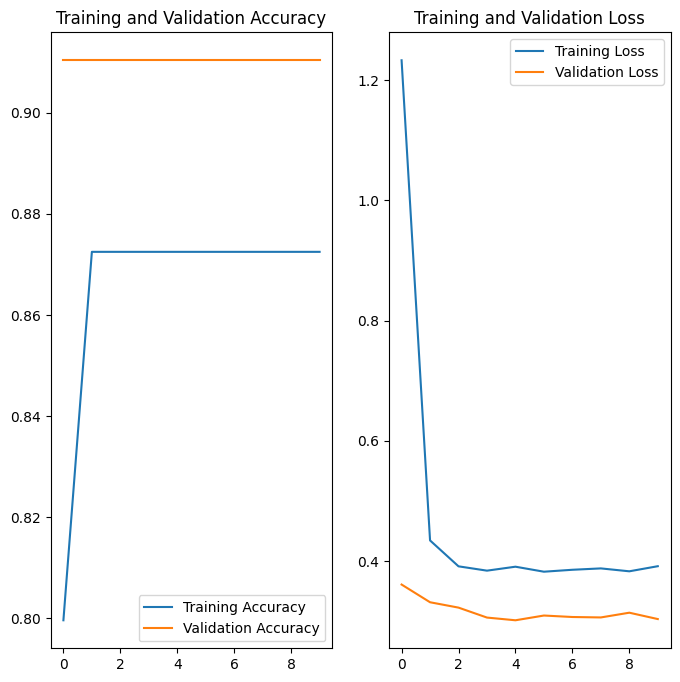

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10  # Replace with the actual number of training epochs you used

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()